In [2]:
# Taken from https://stackabuse.com/k-nearest-neighbors-algorithm-in-python-and-scikit-learn/ 

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']
dataset = pd.read_csv(url, names=names)

In [3]:
dataset.head()

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 4].values
print(y)

['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=5)
print(X_train)

[[5.1 3.4 1.5 0.2]
 [5.5 2.3 4.  1.3]
 [5.7 2.6 3.5 1. ]
 [5.4 3.7 1.5 0.2]
 [7.  3.2 4.7 1.4]
 [5.  3.3 1.4 0.2]
 [5.  3.5 1.6 0.6]
 [7.7 3.  6.1 2.3]
 [5.  3.5 1.3 0.3]
 [6.4 3.2 5.3 2.3]
 [5.8 2.7 5.1 1.9]
 [5.6 2.5 3.9 1.1]
 [5.1 3.5 1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [6.5 2.8 4.6 1.5]
 [6.2 2.8 4.8 1.8]
 [5.9 3.  4.2 1.5]
 [6.7 3.3 5.7 2.1]
 [7.7 3.8 6.7 2.2]
 [5.4 3.4 1.7 0.2]
 [6.3 2.5 5.  1.9]
 [5.  3.2 1.2 0.2]
 [4.6 3.4 1.4 0.3]
 [5.7 4.4 1.5 0.4]
 [5.2 3.4 1.4 0.2]
 [6.2 2.9 4.3 1.3]
 [6.3 3.3 4.7 1.6]
 [5.5 2.4 3.7 1. ]
 [5.1 2.5 3.  1.1]
 [5.9 3.  5.1 1.8]
 [5.  2.  3.5 1. ]
 [6.5 3.  5.2 2. ]
 [6.5 3.  5.8 2.2]
 [6.9 3.1 4.9 1.5]
 [4.6 3.6 1.  0.2]
 [6.6 3.  4.4 1.4]
 [4.9 3.1 1.5 0.1]
 [6.7 3.  5.  1.7]
 [6.7 3.  5.2 2.3]
 [5.6 2.9 3.6 1.3]
 [6.3 3.4 5.6 2.4]
 [5.6 2.7 4.2 1.3]
 [6.1 3.  4.9 1.8]
 [6.3 2.3 4.4 1.3]
 [5.8 2.6 4.  1.2]
 [5.7 3.  4.2 1.2]
 [6.9 3.1 5.4 2.1]
 [6.8 2.8 4.8 1.4]
 [5.2 4.1 1.5 0.1]
 [5.8 2.7 5.1 1.9]
 [4.3 3.  1.1 0.1]
 [4.8 3.4 1.9 0.2]
 [5.2 2.7 3.

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [7]:
print(X_train)

[[-0.88140924  0.72750289 -1.23547394 -1.26527703]
 [-0.40389633 -1.69139841  0.17434798  0.16834158]
 [-0.16513988 -1.03169805 -0.10761641 -0.22264531]
 [-0.52327456  1.38720324 -1.23547394 -1.26527703]
 [ 1.38677706  0.28770265  0.56909811  0.29867054]
 [-1.00078746  0.50760277 -1.29186681 -1.26527703]
 [-1.00078746  0.94740301 -1.17908106 -0.74396117]
 [ 2.22242464 -0.15209758  1.35859839  1.47163122]
 [-1.00078746  0.94740301 -1.34825969 -1.13494806]
 [ 0.6705077   0.28770265  0.90745537  1.47163122]
 [-0.04576165 -0.81179793  0.79466962  0.95031536]
 [-0.28451811 -1.25159817  0.1179551  -0.09231635]
 [-0.88140924  0.94740301 -1.29186681 -1.13494806]
 [-0.88140924  1.60710336 -1.17908106 -1.26527703]
 [ 0.78988593 -0.59189782  0.51270524  0.42899951]
 [ 0.43175125 -0.59189782  0.62549099  0.8199864 ]
 [ 0.07361657 -0.15209758  0.28713373  0.42899951]
 [ 1.02864238  0.50760277  1.13302688  1.21097329]
 [ 2.22242464  1.60710336  1.69695564  1.34130226]
 [-0.52327456  0.72750289 -1.12

In [8]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [9]:
y_pred = classifier.predict(X_test)

In [10]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
"""
              setosa       versicolor     virginica 
setosa           8              0             0
versicolor       0              10            1
virginica        0              1             10

true positives Correct HITS
true negatives Correct MISSES
false positives (Type 1 Error)
false negatives (Type 2 Error)


Precision = True Positives / (True Positives + False Positives)
Recall = True Positives / (True Positives + False Negatives)
F1 Score = (2 * Precision * Recall) / (Precision + Recall) # harmonic mean of precision and recall
"""

[[ 8  0  0]
 [ 0 10  1]
 [ 0  1 10]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
Iris-versicolor       0.91      0.91      0.91        11
 Iris-virginica       0.91      0.91      0.91        11

       accuracy                           0.93        30
      macro avg       0.94      0.94      0.94        30
   weighted avg       0.93      0.93      0.93        30



'\n              setosa       versicolor     virginica \nsetosa           8              0             0\nversicolor       0              10            1\nvirginica        0              1             10\n\ntrue positives Correct HITS\ntrue negatives Correct MISSES\nfalse positives (Type 1 Error)\nfalse negatives (Type 2 Error)\n\n\nPrecision = True Positives / (True Positives + False Positives)\nRecall = True Positives / (True Positives + False Negatives)\nF1 Score = (2 * Precision * Recall) / (Precision + Recall) # harmonic mean of precision and recall\n'

In [11]:
error = []

for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i) # different values of K
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    if i == 1: print(pred_i)
    error.append(np.mean(pred_i != y_test))

['Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica'
 'Iris-setosa' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-virginica' 'Iris-virginica' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-virginica' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa' 'Iris-virginica'
 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-virginica']


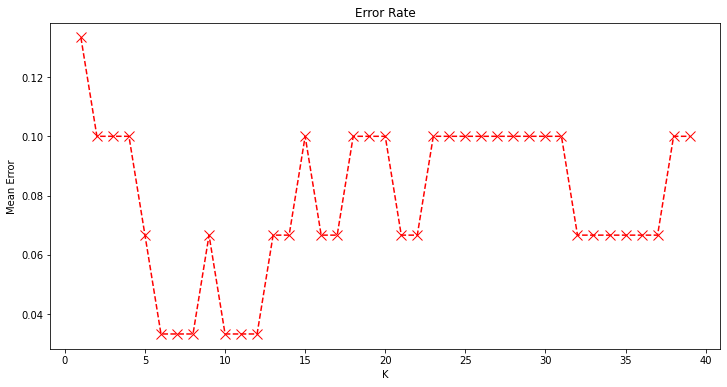

In [12]:
plt.figure(figsize=(12,6))
plt.plot(range(1,40), error, color='red', linestyle='dashed', marker='x', markerfacecolor='blue', markersize=10)
plt.title('Error Rate')
plt.xlabel('K')
plt.ylabel('Mean Error')
plt.show()

In [13]:
from scipy.stats import mode

def knn_manual(D_x, D_y, K, x_hats):
    results = np.array([])
    for x_hat in x_hats:
        # empty 2d array
        neighbor_distance = np.empty((2))
        
        for i in range(len(D_x)):
            # distance formula
            distance_pair = np.array([i, np.sqrt(np.sum((D_x[i]-x_hat)**2))])
            neighbor_distance = np.vstack([neighbor_distance, distance_pair])

        # sorting the array based on the lowest distance (the second value of the 2nd dimension array)
        neighbor_distance = neighbor_distance[neighbor_distance[:,1].argsort()]
        
        # getting the index of the K nearest neighbors
        desired_rows = neighbor_distance[:K,0].astype('int')
        
        # getting the mode of the K nearest neighbors' labels
        results = np.append(results, mode(D_y[desired_rows])[0][0])
    return results

In [14]:
error = []

for i in range(1,40):
    pred_i = knn_manual(X_train, y_train, i, X_test) # different values of K
    if i == 1: print(pred_i)
    error.append(np.mean(pred_i != y_test))

['Iris-versicolor' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa']


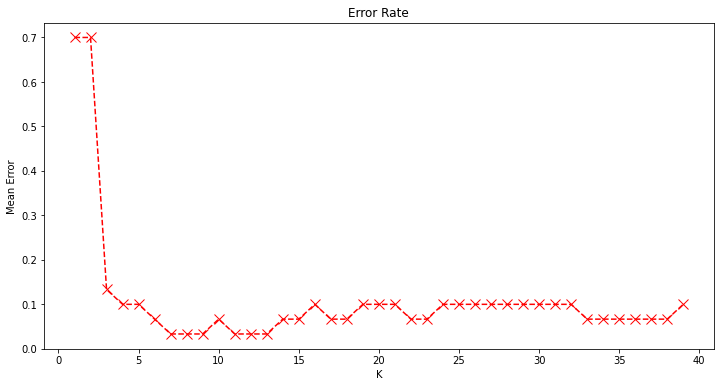

In [16]:
plt.figure(figsize=(12,6))
plt.plot(range(1,40), error, color='red', linestyle='dashed', marker='x', markerfacecolor='blue', markersize=10)
plt.title('Error Rate')
plt.xlabel('K')
plt.ylabel('Mean Error')
plt.show()